In [3]:
data <- read.csv("sdg6_sanitation_pre_post.csv")
head(data)

,Country,Pre_Improved_Sanitation,Post_Improved_Sanitation,Sample_Size
,<chr>,<int>,<int>,<int>
1,Kenya,56,70,100
2,Uganda,53,69,100
3,Tanzania,61,69,100
4,Rwanda,63,75,100
5,Ethiopia,47,65,100
6,Nepal,53,67,100


In [9]:
alpha_prior <- 1
beta_prior <- 1

In [10]:
data$Post_Alpha <- alpha_prior + data$Post_Improved_Sanitation
data$Post_Beta <- beta_prior + (data$Sample_Size - data$Post_Improved_Sanitation)

In [11]:
set.seed(42)
data$Prob_Above_70 <- sapply(1:nrow(data), function(i) {
  samples <- rbeta(10000, data$Post_Alpha[i], data$Post_Beta[i])
  mean(samples > 0.7)
})

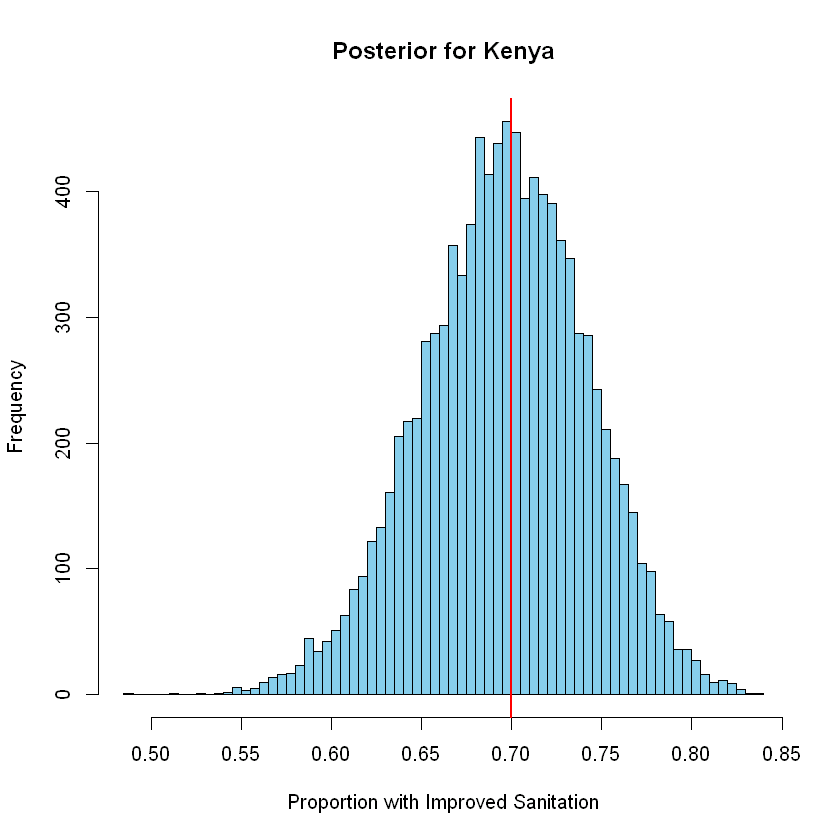

In [12]:
samples <- rbeta(10000, data$Post_Alpha[1], data$Post_Beta[1])
hist(samples, breaks = 50, col = "skyblue",
     main = paste("Posterior for", data$Country[1]),
     xlab = "Proportion with Improved Sanitation")
abline(v = 0.7, col = "red", lwd = 2)

In [13]:
summary_table <- data[c("Country", "Post_Improved_Sanitation", "Prob_Above_70")]
print(summary_table)

      Country Post_Improved_Sanitation Prob_Above_70
1       Kenya                       70        0.4786
2      Uganda                       69        0.3897
3    Tanzania                       69        0.3893
4      Rwanda                       75        0.8504
5    Ethiopia                       65        0.1258
6       Nepal                       67        0.2388
7  Bangladesh                       71        0.5664
8    Cambodia                       75        0.8525
9       Haiti                       70        0.4873
10  Guatemala                       68        0.3092
